# About Dataset

### Context
This dataset can be used to predict the chronic kidney disease and it can be collected from the hospital nearly 2 months of period.

The dataset can be downloaded from https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

# Files Details
**Name:** kidney_disease.csv

# Dataset Information

- **age** - age  
- **bp** - blood pressure  
- **sg** - specific gravity  
- **al** - albumin  
- **su** - sugar  
- **rbc** - red blood cells  
- **pc** - pus cell  
- **pcc** - pus cell clumps  
- **ba** - bacteria  
- **bgr** - blood glucose random  
- **bu** - blood urea  
- **sc** - serum creatinine  
- **sod** - sodium  
- **pot** - potassium  
- **hemo** - hemoglobin  
- **pcv** - packed cell volume  
- **wc** - white blood cell count  
- **rc** - red blood cell count  
- **htn** - hypertension  
- **dm** - diabetes mellitus  
- **cad** - coronary artery disease  
- **appet** - appetite  
- **pe** - pedal edema  
- **ane** - anemia  
- **class** - class  


# Problem Define

- Classification problem pridicting chronic kidney disease (ckd)

# Read the Data

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report, roc_auc_score

In [30]:
# Read data in pandas
kidney_disease_csv = pd.read_csv(r'C:\Users\Ton\Desktop\Data_Institute\_prj_02\kidney_disease.csv')

# Check data has loaded correctly
print(kidney_disease_csv.head())
print(kidney_disease_csv.columns)

# Function to remove spaces from non-numeric values
def remove_spaces(value):
    if isinstance(value, str):
        return value.replace(' ', '')
    return value

# Apply the function to the entire dataframe
kidney_disease_csv = kidney_disease_csv.applymap(remove_spaces)


   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]
Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 

C:\Users\Ton\AppData\Local\Temp\ipykernel_22108\1202264300.py:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  kidney_disease_csv = kidney_disease_csv.applymap(remove_spaces)


# EDA and Clean the Data

In [31]:
# Display the number of rows in the dataframe
num_rows = kidney_disease_csv.shape[0]
print(f"Number of rows: {num_rows}")

# Number of features
num_features = kidney_disease_csv.shape[1]
print(f"Number of features: {num_features}")

# Data types
data_types = kidney_disease_csv.dtypes
print("Data types:\n", data_types)

# Domains, Intervals
domains_intervals = kidney_disease_csv.describe().transpose()[['min', 'max']]
print("Domains and Intervals:\n", domains_intervals)

Number of rows: 400
Number of features: 26
Data types:
 id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object
Domains and Intervals:
          min      max
id     0.000  399.000
age    2.000   90.000
bp    50.000  180.000
sg     1.005    1.025
al     0.000    5.000
su     0.000    5.000
bgr   22.000  490.000
bu     1.500  391.000
sc     0.400   76.000
sod    4.5

In [32]:
# Replace 'ckd' with 1 and 'notckd' with 0 in the 'classification' column
kidney_disease_csv['classification'] = kidney_disease_csv['classification'].replace({'ckd': 1, 'notckd': 0})

# Drop the 'id' column from the dataframe
kidney_disease_csv = kidney_disease_csv.drop(columns=['id'])

C:\Users\Ton\AppData\Local\Temp\ipykernel_22108\1648773320.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney_disease_csv['classification'] = kidney_disease_csv['classification'].replace({'ckd': 1, 'notckd': 0})


In [33]:
# Define the replacement dictionary
replacement_dict = {
    'abnormal': 1,
    'yes': 1,
    'present': 1,
    'poor': 1,
    'normal': 0,
    'no': 0,
    'notpresent': 0,
    'good': 0
}

# Replace values in non-numeric columns
for column in kidney_disease_csv.select_dtypes(include=['object']).columns:
    kidney_disease_csv[column] = kidney_disease_csv[column].replace(replacement_dict)

# Verify the changes
print(kidney_disease_csv.head())

    age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...  pcv    wc  \
0  48.0  80.0  1.020  1.0  0.0  NaN  0.0  0.0  0.0  121.0  ...   44  7800   
1   7.0  50.0  1.020  4.0  0.0  NaN  0.0  0.0  0.0    NaN  ...   38  6000   
2  62.0  80.0  1.010  2.0  3.0  0.0  0.0  0.0  0.0  423.0  ...   31  7500   
3  48.0  70.0  1.005  4.0  0.0  0.0  1.0  1.0  0.0  117.0  ...   32  6700   
4  51.0  80.0  1.010  2.0  0.0  0.0  0.0  0.0  0.0  106.0  ...   35  7300   

    rc  htn  dm cad appet   pe  ane classification  
0  5.2  1.0   1   0   0.0  0.0  0.0              1  
1  NaN  0.0   0   0   0.0  0.0  0.0              1  
2  NaN  0.0   1   0   1.0  0.0  1.0              1  
3  3.9  1.0   0   0   1.0  1.0  1.0              1  
4  4.6  0.0   0   0   0.0  0.0  0.0              1  

[5 rows x 25 columns]


C:\Users\Ton\AppData\Local\Temp\ipykernel_22108\670974681.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  kidney_disease_csv[column] = kidney_disease_csv[column].replace(replacement_dict)


In [34]:
# Fill NaN values with the mean for float columns and mode for int or object columns
# Define a function to fill NaN values
def fill_nan(df):
    for col in df.columns:
        if df[col].dtype == 'float64':
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Apply the function to fill NaN values
kidney_disease_csv = fill_nan(kidney_disease_csv)

# Verify the changes
print(kidney_disease_csv.head())


    age    bp     sg   al   su       rbc   pc  pcc   ba         bgr  ...  pcv  \
0  48.0  80.0  1.020  1.0  0.0  0.189516  0.0  0.0  0.0  121.000000  ...   44   
1   7.0  50.0  1.020  4.0  0.0  0.189516  0.0  0.0  0.0  148.036517  ...   38   
2  62.0  80.0  1.010  2.0  3.0  0.000000  0.0  0.0  0.0  423.000000  ...   31   
3  48.0  70.0  1.005  4.0  0.0  0.000000  1.0  1.0  0.0  117.000000  ...   32   
4  51.0  80.0  1.010  2.0  0.0  0.000000  0.0  0.0  0.0  106.000000  ...   35   

     wc   rc  htn  dm cad appet   pe  ane classification  
0  7800  5.2  1.0   1   0   0.0  0.0  0.0              1  
1  6000  5.2  0.0   0   0   0.0  0.0  0.0              1  
2  7500  5.2  0.0   1   0   1.0  0.0  1.0              1  
3  6700  3.9  1.0   0   0   1.0  1.0  1.0              1  
4  7300  4.6  0.0   0   0   0.0  0.0  0.0              1  

[5 rows x 25 columns]


C:\Users\Ton\AppData\Local\Temp\ipykernel_22108\1678067710.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\Ton\AppData\Local\Temp\ipykernel_22108\1678067710.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [35]:
# Replace all non-numeric values with the mode of the column
for column in kidney_disease_csv.select_dtypes(include=['object']).columns:
    # Calculate the mode (most frequent value) of the column
    mode_value = kidney_disease_csv[column].mode()[0]
    
    # Replace non-numeric values with the mode
    kidney_disease_csv[column] = pd.to_numeric(kidney_disease_csv[column], errors='coerce').fillna(mode_value)

    # Convert the column to float
    kidney_disease_csv[column] = kidney_disease_csv[column].astype(float)

# Change columns of type object to float
for column in kidney_disease_csv.select_dtypes(include=['object']).columns:
    kidney_disease_csv[column] = kidney_disease_csv[column].astype(float)

# Verify the changes
print(kidney_disease_csv.dtypes)


age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                float64
cad               float64
appet             float64
pe                float64
ane               float64
classification      int64
dtype: object


In [36]:
# Change all columns which contain just 0 and 1 to binary type
for column in kidney_disease_csv.columns:
    if set(kidney_disease_csv[column].dropna().unique()) <= {0, 1}:
        kidney_disease_csv[column] = kidney_disease_csv[column].astype('int8')

# Verify the changes
print(kidney_disease_csv.dtypes)

age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc               float64
pc                float64
pcc               float64
ba                float64
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn               float64
dm                   int8
cad                  int8
appet             float64
pe                float64
ane               float64
classification       int8
dtype: object


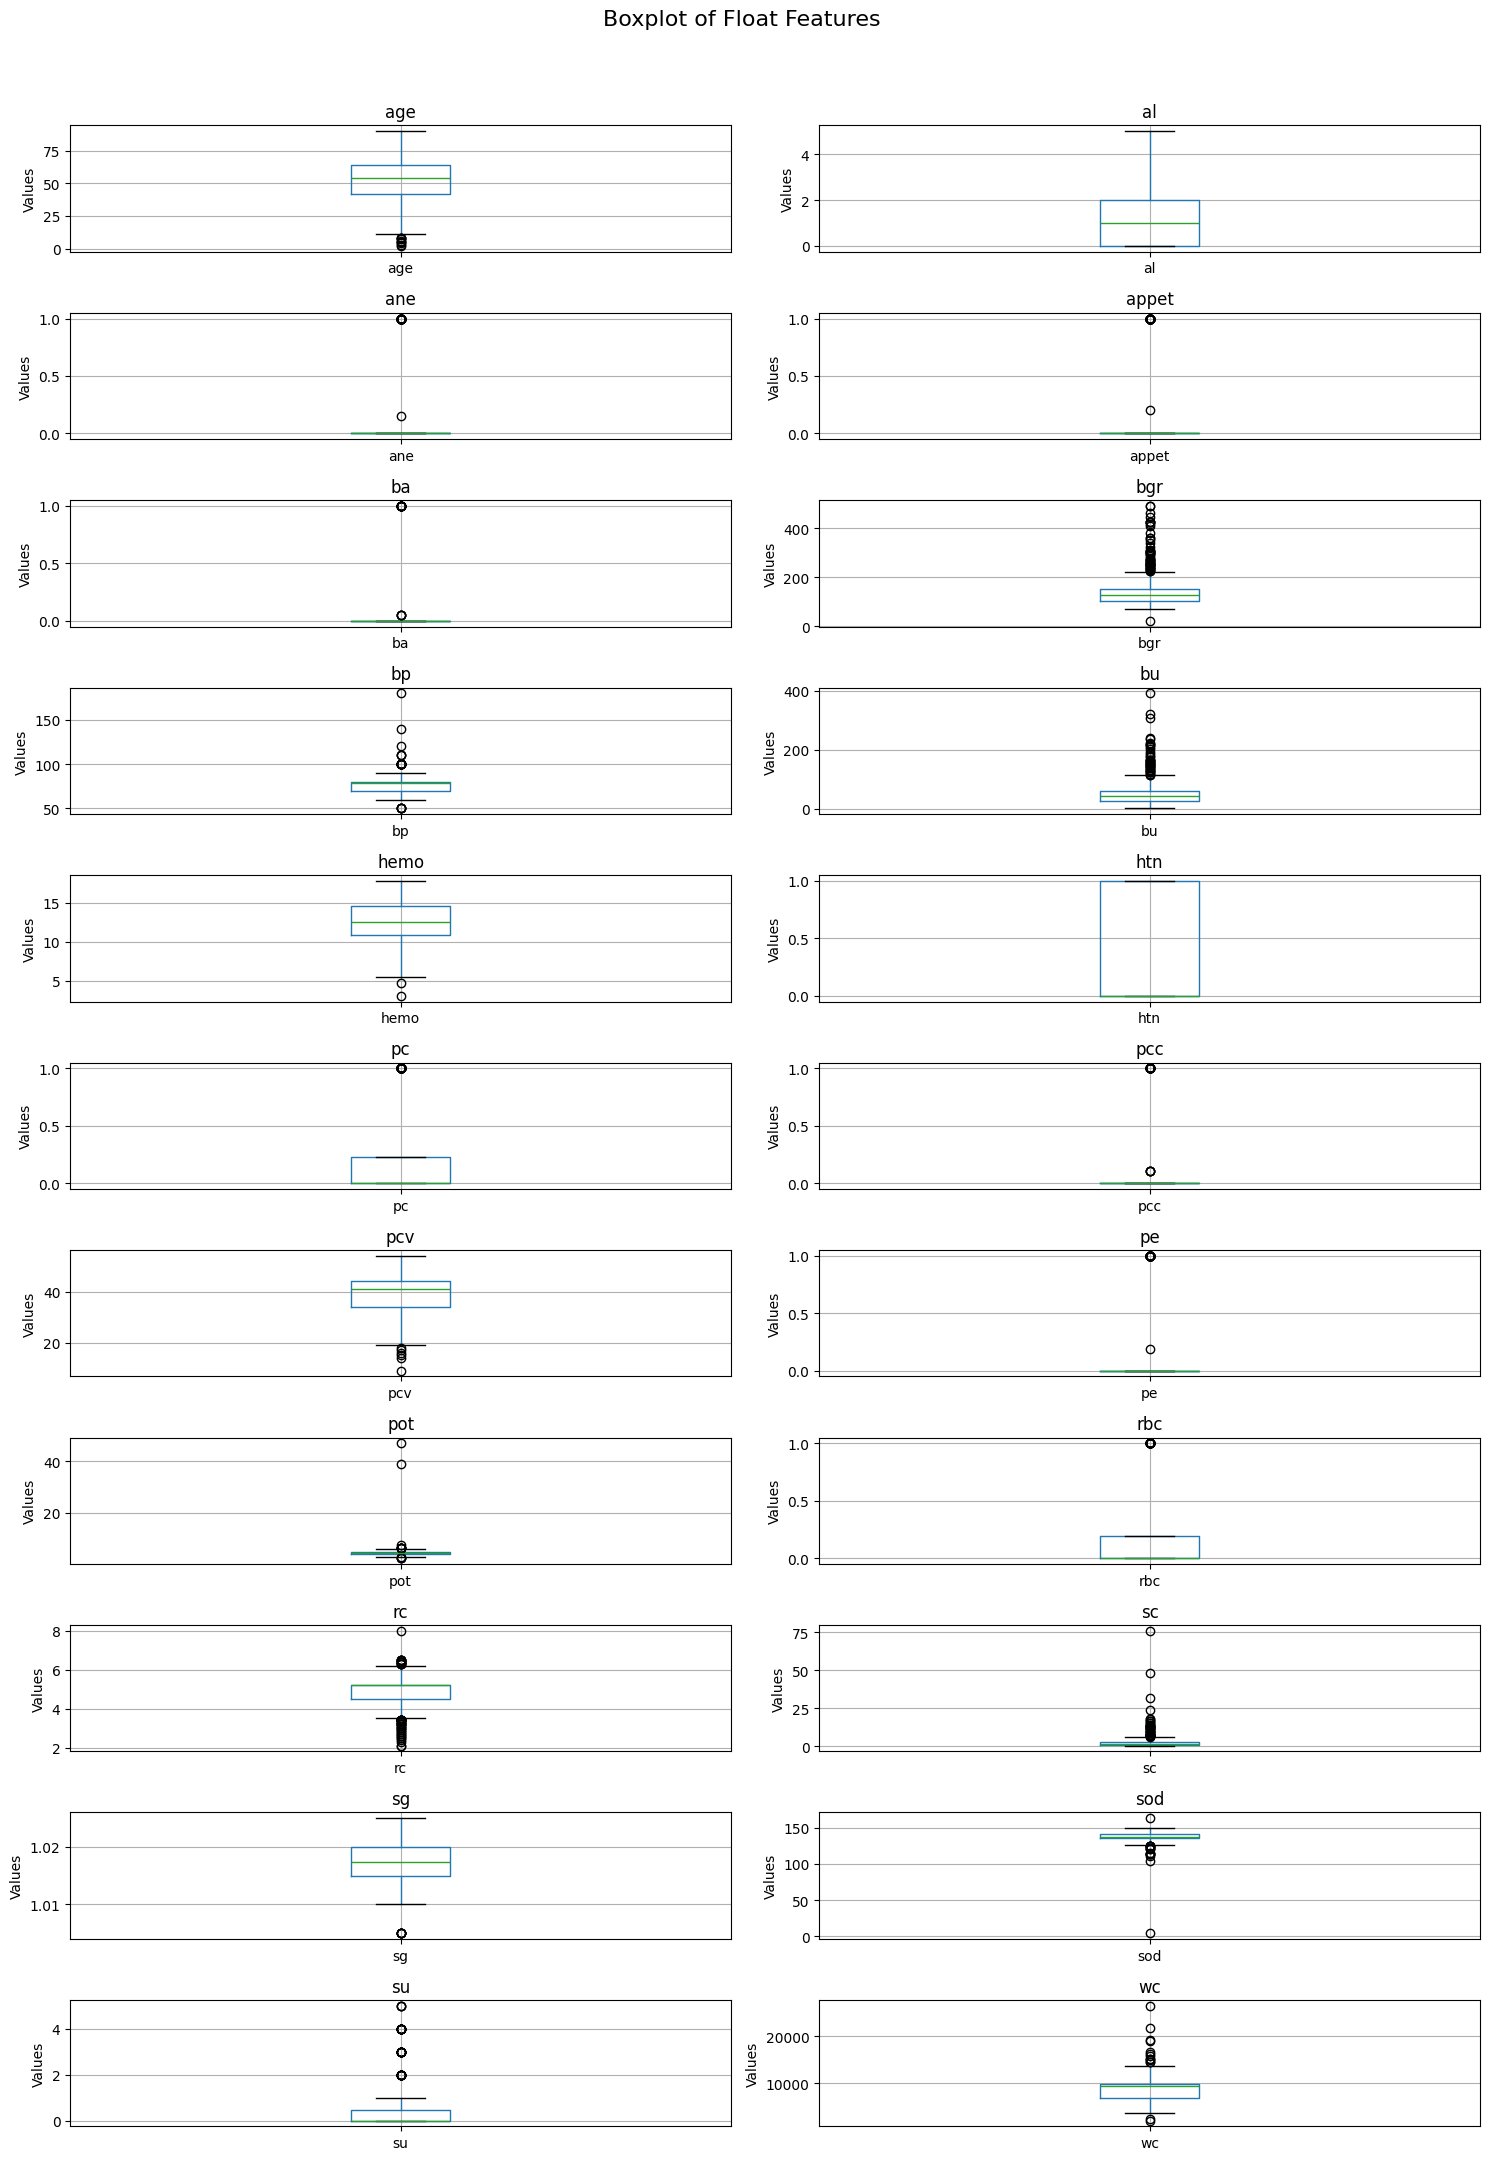

In [37]:
# Creat boxplot
# Identify float columns excluding 'classification' and 'id'
features = kidney_disease_csv.select_dtypes(include=['float64']).columns.difference(['classification', 'id'])

# Calculate the number of rows needed (2 columns)
n_features = len(features)
n_cols = 2
n_rows = (n_features + n_cols - 1) // n_cols  # Ensure enough rows for all features

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 2 * n_rows))
fig.suptitle('Boxplot of Float Features ', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(features):
    kidney_disease_csv.boxplot(column=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].set_ylabel('Values')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Correlation with Classification (sorted in descending order):
al       0.6
dm       0.6
htn      0.6
pe       0.4
rbc      0.4
pc       0.4
appet    0.4
bgr      0.4
bu       0.4
ane      0.3
wc       0.3
su       0.3
pcc      0.3
sc       0.3
bp       0.3
cad      0.2
age      0.2
ba       0.2
pot      0.1
sod     -0.3
rc      -0.4
pcv     -0.7
hemo    -0.7
sg      -0.7
Name: classification, dtype: float64


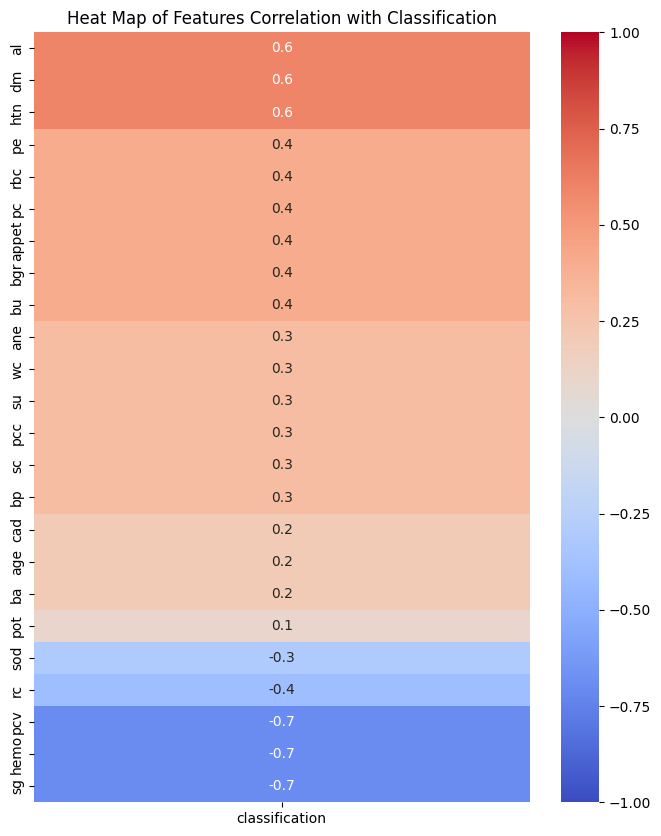

In [38]:
# Find correlation
# Calculate the correlation matrix for the 'classification' column with other features
correlation_with_classification = kidney_disease_csv.corr().round(1)['classification']

# Drop the correlation of 'classification' with itself
correlation_with_classification = correlation_with_classification.drop('classification')

# Sort the correlations in descending order
correlation_with_classification = correlation_with_classification.sort_values(ascending=False)

# Display the correlation matrix as a table
print("Correlation with Classification (sorted in descending order):")
print(correlation_with_classification)

# Heat map of features related to classification
plt.figure(figsize=(8, 10))
sns.heatmap(correlation_with_classification.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heat Map of Features Correlation with Classification')
plt.show()

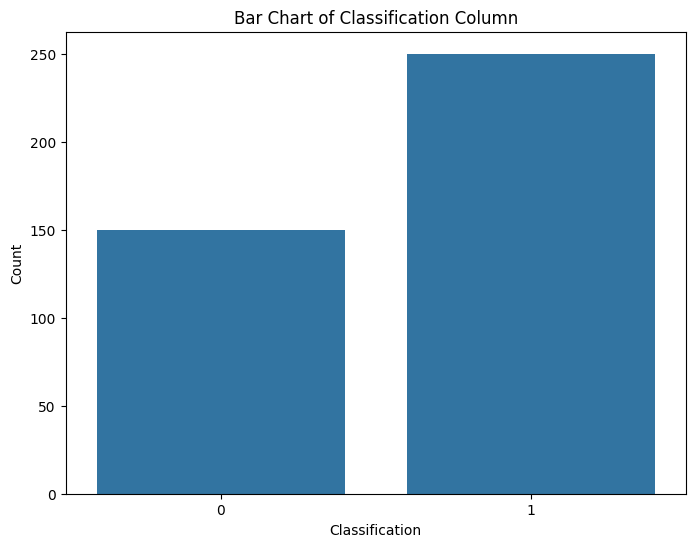

In [39]:
# Check class balance
# Bar chart of classification column
plt.figure(figsize=(8, 6))
sns.countplot(x='classification', data=kidney_disease_csv)
plt.title('Bar Chart of Classification Column')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()


Count where 'dm' = 1 and 'classification' = 1: 135
Count where 'classification' = 1: 250


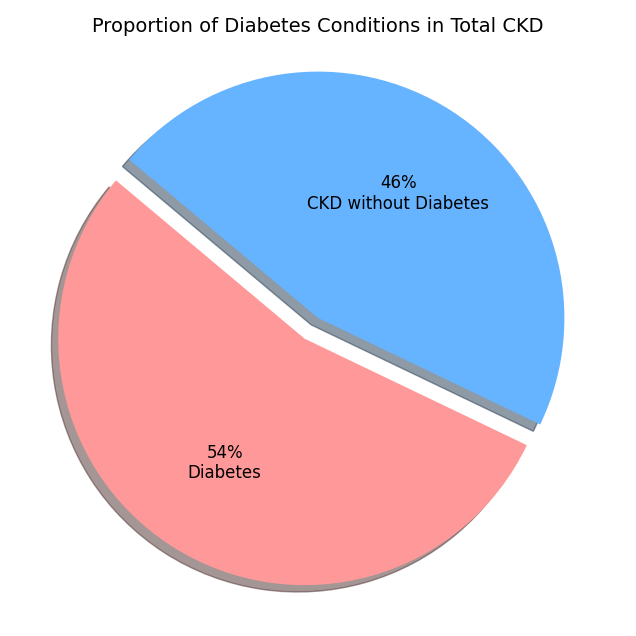

In [56]:
# Calculate the percantage where 'dm' = 1 to 'classification' = 1
# Count the number of rows where 'dm' = 1 and 'classification' = 1
count_condition_1  = kidney_disease_csv[(kidney_disease_csv['dm'] == 1) & 
                                       (kidney_disease_csv['classification'] == 1)].shape[0]

print(f"Count where 'dm' = 1 and 'classification' = 1: {count_condition_1 }")


# Count the number of rows where 'classification' = 1
count_condition_2  = kidney_disease_csv[(kidney_disease_csv['classification'] == 1)].shape[0]

print(f"Count where 'classification' = 1: {count_condition_2}")


# Calculate the remaining rows
remaining_condition = count_condition_2 - count_condition_1

# Data for pie chart
sizes = [count_condition_1, remaining_condition]
labels = ['Diabetes', 'CKD without Diabetes']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Custom function to display labels under percentage values
def func(pct, allvals):
    return "{:.0f}%".format(pct)

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct=lambda pct: func(pct, sizes),
                                   shadow=True, startangle=140)

# Add labels under percentage values
for i, a in enumerate(autotexts):
    a.set_text(a.get_text() + '\n' + labels[i])
    a.set_fontsize(12)

plt.title('Proportion of Diabetes Conditions in Total CKD', x=0.5, y=0.95, fontsize=14)
plt.setp(autotexts, size=12)
plt.show()

Count where 'dm' = 1 and 'classification' = 1: 147
Count where 'classification' = 1: 250


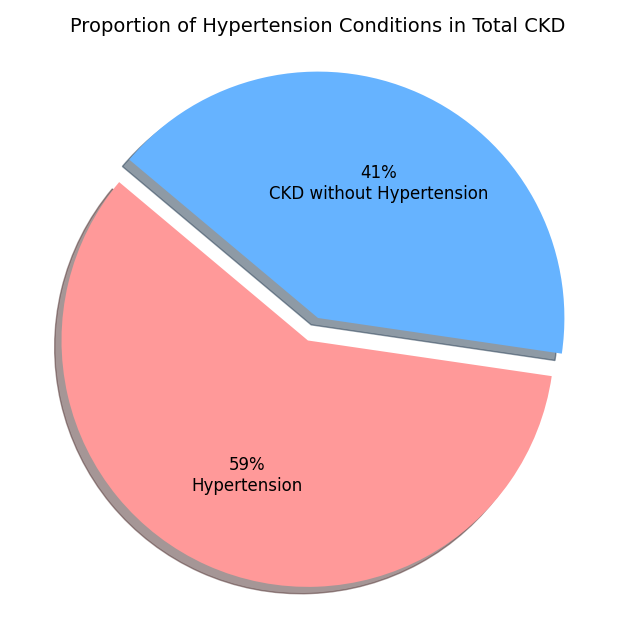

In [57]:
# Calculate the percantage where 'htn' = 1 to 'classification' = 1
# Count the number of rows where 'htn' = 1 and 'classification' = 1
count_condition_1  = kidney_disease_csv[(kidney_disease_csv['htn'] == 1) & 
                                       (kidney_disease_csv['classification'] == 1)].shape[0]

print(f"Count where 'dm' = 1 and 'classification' = 1: {count_condition_1 }")


# Count the number of rows where 'classification' = 1
count_condition_2  = kidney_disease_csv[(kidney_disease_csv['classification'] == 1)].shape[0]

print(f"Count where 'classification' = 1: {count_condition_2}")


# Calculate the remaining rows
remaining_condition = count_condition_2 - count_condition_1

# Data for pie chart
sizes = [count_condition_1, remaining_condition]
labels = ['Hypertension', 'CKD without Hypertension']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Custom function to display labels under percentage values
def func(pct, allvals):
    return "{:.0f}%".format(pct)

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct=lambda pct: func(pct, sizes),
                                   shadow=True, startangle=140)

# Add labels under percentage values
for i, a in enumerate(autotexts):
    a.set_text(a.get_text() + '\n' + labels[i])
    a.set_fontsize(12)

plt.title('Proportion of Hypertension Conditions in Total CKD', x=0.5, y=0.95, fontsize=14)
plt.setp(autotexts, size=12)
plt.show()

Count where 'dm' = 1 and 'htn' = 1: 104
Count where 'classification' = 1: 250


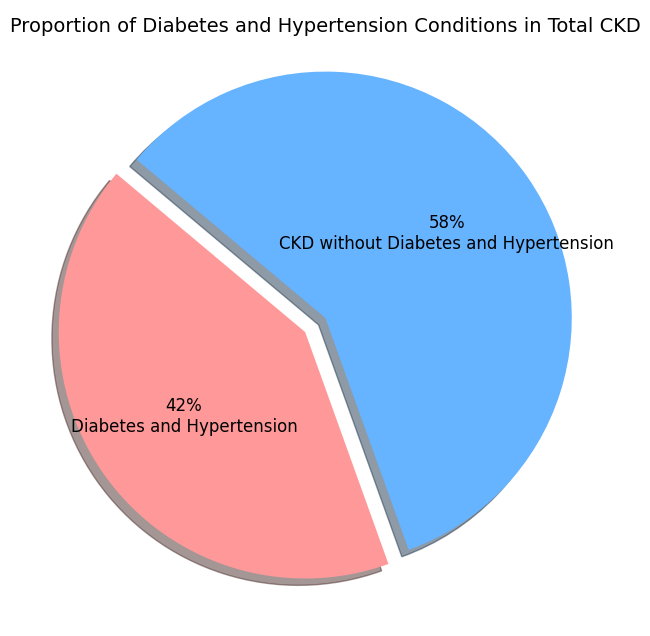

In [58]:
# Calculate the percantage where 'dm' = 1 and 'htn' = 1 to the total 'classification' = 1
# Count the number of rows where 'dm' = 1 and 'htn' = 1
count_condition_1  = kidney_disease_csv[(kidney_disease_csv['dm'] == 1) & 
                                       (kidney_disease_csv['htn'] == 1)].shape[0]

print(f"Count where 'dm' = 1 and 'htn' = 1: {count_condition_1 }")


# Count the number of rows where 'classification' = 1
count_condition_2  = kidney_disease_csv[(kidney_disease_csv['classification'] == 1)].shape[0]

print(f"Count where 'classification' = 1: {count_condition_2}")


# Calculate the remaining rows
remaining_condition = count_condition_2 - count_condition_1

# Data for pie chart
sizes = [count_condition_1, remaining_condition]
labels = ['Diabetes and Hypertension', 'CKD without Diabetes and Hypertension']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Custom function to display labels under percentage values
def func(pct, allvals):
    return "{:.0f}%".format(pct)

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct=lambda pct: func(pct, sizes),
                                   shadow=True, startangle=140)

# Add labels under percentage values
for i, a in enumerate(autotexts):
    a.set_text(a.get_text() + '\n' + labels[i])
    a.set_fontsize(12)

plt.title('Proportion of Diabetes and Hypertension Conditions in Total CKD', x=0.5, y=0.95, fontsize=14)
plt.setp(autotexts, size=12)
plt.show()

In [50]:
# Find correlation between 'dm' and 'htn'
# Calculate the correlation between 'dm' and 'htn'
correlation = kidney_disease_csv['dm'].corr(kidney_disease_csv['htn'])

print(f"The correlation between 'dm' and 'htn' is: {correlation:.2f}")

The correlation between 'dm' and 'htn' is: 0.59


Count where 'htn' = 1 and 'dm' = 1: 104
Count where 'dm' = 1: 135


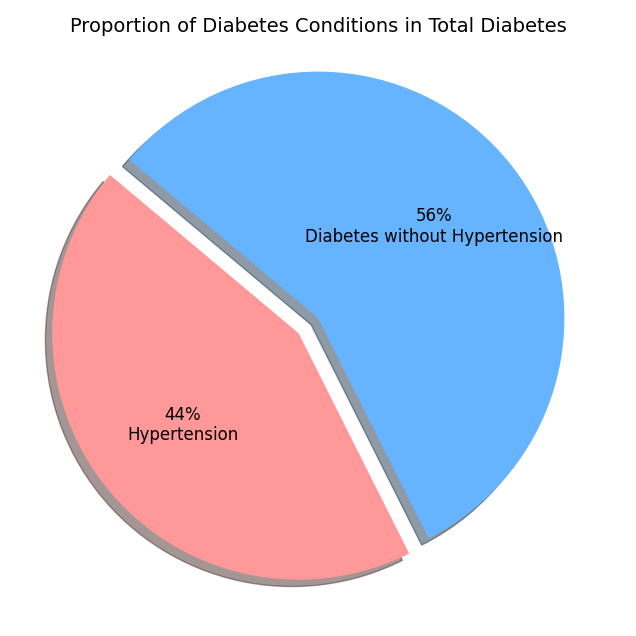

In [63]:
# Calculate the percantage where 'htn' = 1 and 'dm' = 1 to total 'dm'
# Count the number of rows where 'htn' = 'htn' = 1 and 'dm' = 1
count_condition_1  = kidney_disease_csv[(kidney_disease_csv['dm'] == 1) & 
                                       (kidney_disease_csv['htn'] == 1)].shape[0]

print(f"Count where 'htn' = 1 and 'dm' = 1: {count_condition_1 }")


# Count the number of rows where 'dm' = 1
count_condition_2  = kidney_disease_csv[(kidney_disease_csv['dm'] == 1)].shape[0]

print(f"Count where 'dm' = 1: {count_condition_2}")


# Calculate the remaining rows
remaining_condition = count_condition_2 - count_condition_1

# Data for pie chart
sizes = [count_condition_1, count_condition_2]
labels = ['Hypertension', 'Diabetes without Hypertension']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

# Custom function to display labels under percentage values
def func(pct, allvals):
    return "{:.0f}%".format(pct)

# Plot pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, explode=explode, colors=colors, autopct=lambda pct: func(pct, sizes),
                                   shadow=True, startangle=140)

# Add labels under percentage values
for i, a in enumerate(autotexts):
    a.set_text(a.get_text() + '\n' + labels[i])
    a.set_fontsize(12)

plt.title('Proportion of Diabetes Conditions in Total Diabetes', x=0.5, y=0.95, fontsize=14)
plt.setp(autotexts, size=12)
plt.show()

# Standardise and split data

In [44]:
# Standardize the numberic columns
# Identify float columns
float_columns = kidney_disease_csv.select_dtypes(include=['float64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the float columns
kidney_disease_csv_scaled = kidney_disease_csv.copy()
kidney_disease_csv_scaled[float_columns] = scaler.fit_transform(kidney_disease_csv[float_columns])

# Verify the changes
print(kidney_disease_csv_scaled[float_columns].head())

        age        bp        sg        al        su           rbc        pc  \
0 -0.205464  0.262338  0.483355 -0.013338 -0.437797  8.994129e-17 -0.591922   
1 -2.623810 -1.966580  0.483355  2.347516 -0.437797  8.994129e-17 -0.591922   
2  0.620313  0.262338 -1.381391  0.773613  2.479925 -6.141226e-01 -0.591922   
3 -0.205464 -0.480635 -2.313764  2.347516 -0.437797 -6.141226e-01  2.017208   
4 -0.028511  0.262338 -1.381391  0.773613 -0.437797 -6.141226e-01 -0.591922   

        pcc        ba       bgr  ...       sod       pot      hemo       pcv  \
0 -0.346183 -0.243757 -0.361987  ...  0.000000  0.000000  1.059271  0.579397   
1 -0.346183 -0.243757  0.000000  ...  0.000000  0.000000 -0.452097 -0.154017   
2 -0.346183 -0.243757  3.681441  ...  0.000000  0.000000 -1.078762 -1.009667   
3  2.917826 -0.243757 -0.415543  ... -2.885831 -0.755345 -0.488960 -0.887431   
4 -0.346183 -0.243757 -0.562820  ...  0.000000  0.000000 -0.341509 -0.520724   

         wc        rc       htn     appet   

In [45]:
# Set variables
# Set the target variable 'classification'
y = kidney_disease_csv_scaled['classification']

# Set the features to all other columns except 'classification'
X = kidney_disease_csv_scaled.drop(columns=['classification'])

# Verify the changes
print("Features (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (X):
        age        bp        sg        al        su           rbc        pc  \
0 -0.205464  0.262338  0.483355 -0.013338 -0.437797  8.994129e-17 -0.591922   
1 -2.623810 -1.966580  0.483355  2.347516 -0.437797  8.994129e-17 -0.591922   
2  0.620313  0.262338 -1.381391  0.773613  2.479925 -6.141226e-01 -0.591922   
3 -0.205464 -0.480635 -2.313764  2.347516 -0.437797 -6.141226e-01  2.017208   
4 -0.028511  0.262338 -1.381391  0.773613 -0.437797 -6.141226e-01 -0.591922   

        pcc        ba       bgr  ...      hemo       pcv        wc        rc  \
0 -0.346183 -0.243757 -0.361987  ...  1.059271  0.579397 -0.376051  0.380521   
1 -0.346183 -0.243757  0.000000  ... -0.452097 -0.154017 -1.069944  0.380521   
2 -0.346183 -0.243757  3.681441  ... -1.078762 -1.009667 -0.491700  0.380521   
3  2.917826 -0.243757 -0.415543  ... -0.488960 -0.887431 -0.800097 -1.112845   
4 -0.346183 -0.243757 -0.562820  ... -0.341509 -0.520724 -0.568799 -0.308725   

        htn  dm  cad     appet

In [46]:
# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shape of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Verify the distribution of the target variable in the splits
print("\nTarget distribution in y_train:")
print(y_train.value_counts(normalize=True))
print("\nTarget distribution in y_test:")
print(y_test.value_counts(normalize=True))


X_train shape: (320, 24)
X_test shape: (80, 24)
y_train shape: (320,)
y_test shape: (80,)

Target distribution in y_train:
classification
1    0.625
0    0.375
Name: proportion, dtype: float64

Target distribution in y_test:
classification
1    0.625
0    0.375
Name: proportion, dtype: float64


# Define and Fit Models (Ensemble Stacking)

In [47]:
# Set GridSearch and fit to models
# Define the parameter grids for GridSearchCV
param_grid_lr = {
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': [0.1, 1, 10]
}

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7],
    'classifier__weights': ['uniform', 'distance']
}

param_grid_svc = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf']
}

param_grid_nb = {
    'classifier__var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Initialize the classifiers
clf1 = LogisticRegression(random_state=42, solver='liblinear')
clf2 = KNeighborsClassifier()
clf3 = SVC(probability=True, random_state=42)
clf4 = GaussianNB()

# Initialize GridSearchCV for each classifier
pipeline_lr = Pipeline([('classifier', clf1)])
pipeline_knn = Pipeline([('classifier', clf2)])
pipeline_svc = Pipeline([('classifier', clf3)])
pipeline_nb = Pipeline([('classifier', clf4)])

grid_search_lr = GridSearchCV(estimator=pipeline_lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_knn = GridSearchCV(estimator=pipeline_knn, param_grid=param_grid_knn, cv=5, n_jobs=-1, verbose=2)
grid_search_svc = GridSearchCV(estimator=pipeline_svc, param_grid=param_grid_svc, cv=5, n_jobs=-1, verbose=2)
grid_search_nb = GridSearchCV(estimator=pipeline_nb, param_grid=param_grid_nb, cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV
grid_search_lr.fit(X_train, y_train)
grid_search_knn.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_nb.fit(X_train, y_train)

# Get the best estimators
best_clf1 = grid_search_lr.best_estimator_['classifier']
best_clf2 = grid_search_knn.best_estimator_['classifier']
best_clf3 = grid_search_svc.best_estimator_['classifier']
best_clf4 = grid_search_nb.best_estimator_['classifier']

# Initialize the StackingClassifier with the best estimators
stacking_clf = StackingClassifier(
    estimators=[
        ('lr', best_clf1),
        ('knn', best_clf2),
        ('svc', best_clf3),
        ('nb', best_clf4)
    ],
    final_estimator=LogisticRegression()
)

# Fit the training data with the StackingClassifier
stacking_clf.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


StackingClassifier(estimators=[('lr',
                                LogisticRegression(C=10, penalty='l1',
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('knn', KNeighborsClassifier()),
                               ('svc',
                                SVC(C=0.1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('nb', GaussianNB())],
                   final_estimator=LogisticRegression())

# Verify and Evaluate the Training Model

In [48]:
# Generate accuracy and classification report
# Evaluate the StackingClassifier
score = stacking_clf.score(X_test, y_test)

# Get predictions for classification report and AUC
y_pred = stacking_clf.predict(X_test)

# Initialize AUC score
auc = None

# Calculate AUC for the StackingClassifier (assuming binary classification)
if len(set(y_test)) == 2:
    y_proba = stacking_clf.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)

# Print the score of the StackingClassifier
print(f"Accuracy: {score:.2f}, AUC: {auc:.2f} [Stacking Classifier]")

# Print classification report
print("\nClassification Report [Stacking Classifier]:")
print(classification_report(y_test, y_pred))

Accuracy: 0.99, AUC: 1.00 [Stacking Classifier]

Classification Report [Stacking Classifier]:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        50

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [49]:
# Last check on cross-validation
# Perform cross-validation
cv_scores = cross_val_score(stacking_clf, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores: ", ["{:.2f}".format(score) for score in cv_scores])
print("Mean cross-validation score: {:.2f}".format(cv_scores.mean()))
print("Standard deviation of cross-validation scores: {:.2f}".format(np.std(cv_scores)))


Cross-validation scores:  ['1.00', '0.98', '1.00', '1.00', '1.00']
Mean cross-validation score: 1.00
Standard deviation of cross-validation scores: 0.01


# Interpretation

<span style="color: magenta;">Based on the evaluation metrics, the Stacking Classifier appears to be an excellent choice.</span>
<br>
<br>
<span style="color: magenta;">Accuracy: High accuracy at 0.99, indicating it correctly predicts the most instances.</span>
<br>
<span style="color: magenta;">AUC: Perfect AUC of 1.00, meaning it distinguishes between the classes exceptionally well.</span>
<br>
<span style="color: magenta;">Classification Report: It has high precision, recall, and F1-scores for both classes, indicating balanced performance.</span>
<br>
<br>
<span style="color: magenta;">Cross-validation: high mean accuracy of 1.0 and low standard deviation of 0.01 suggests that model is both accurate and robust, performing consistently well across different subsets.</span>
<br>